In [1]:
print ("Hello world")

Hello world


In [2]:
# Importing packages
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [3]:
# Loading in Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
# Declaring class names
# Match the index value to a type of clothing
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# Exploring the data 
print(train_images.shape)
print (len(train_labels))

(60000, 28, 28)
60000


In [6]:
# Exploring the data 
print(train_images.shape)
print(len(train_labels))
print(train_labels) 

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


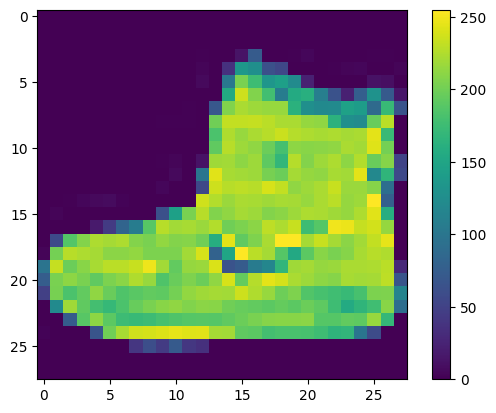

In [7]:
# Beginning the preproccessing
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# Beginning the preproccessing

# Demonstration of the range
# plt.figure()
# plt.imshow(train_images[20])
# plt.colorbar()
# plt.grid(False)
# plt.show()


train_images = train_images / 255.0
test_images = test_images / 255.0

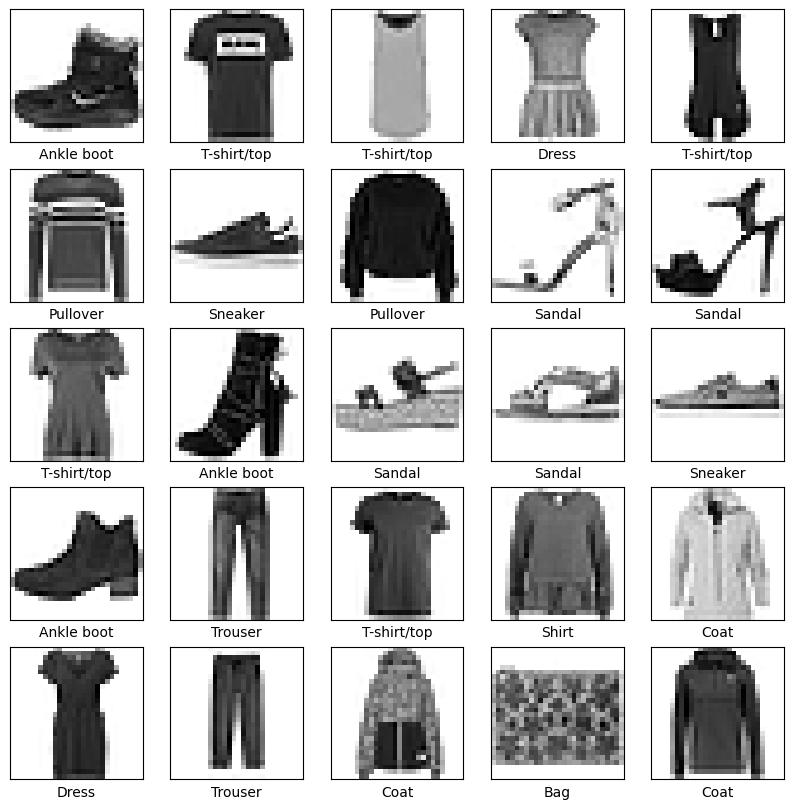

In [10]:
# Show the first set of images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
# Creating the model

# The first layer flattens the 2D array to a 1D array
# The second and third layers are fully connected neural layers
# The third layer returns a score
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [12]:
# Compiling the model

# Optimizer is how the model is updated based on data and loss function
# Loss function -> should be minimized if possible
# Accuracy is monitored as a metric
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# Training the model
# Fits the model to the training data
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4935 - accuracy: 0.8270
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3736 - accuracy: 0.8675
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3365 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3131 - accuracy: 0.8854
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2942 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2819 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2702 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2599 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2487 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.241

In [14]:
# Evaluating the accuracy of the model on the test dataset
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3271 - accuracy: 0.8853 - 978ms/epoch - 3ms/step

Test accuracy: 0.8852999806404114

Test accuracy: 0.8852999806404114


In [16]:
# Making predictions example
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

print("Predictions for the 0th element: {}".format(predictions[0]))
max_val = np.argmax(predictions[0])
print("Predicted item: {}, {}".format(max_val, class_names[max_val]))

313/313 [==============================] - 1s 2ms/step
Predictions for the 0th element: [8.1828795e-05 1.9809292e-09 2.0773823e-09 1.7462641e-09 7.4774213e-08
 4.9354137e-05 4.2832864e-05 2.0315392e-02 3.7199177e-07 9.7951013e-01]
Predicted item: 9, Ankle boot


In [17]:
# Making predictions example
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

print("Predictions for the 0th element: {}".format(predictions[0]))
max_val = np.argmax(predictions[0])
print("Predicted item: {}, {}".format(max_val, class_names[max_val]))
print("Actual class: {}, {}".format(test_labels[0], class_names[test_labels[0]]))

313/313 [==============================] - 1s 2ms/step
Predictions for the 0th element: [8.1828795e-05 1.9809292e-09 2.0773823e-09 1.7462641e-09 7.4774213e-08
 4.9354137e-05 4.2832864e-05 2.0315392e-02 3.7199177e-07 9.7951013e-01]
Predicted item: 9, Ankle boot
Actual class: 9, Ankle boot


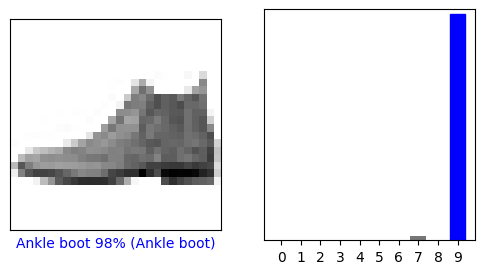

In [19]:
# Creating graphs...

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

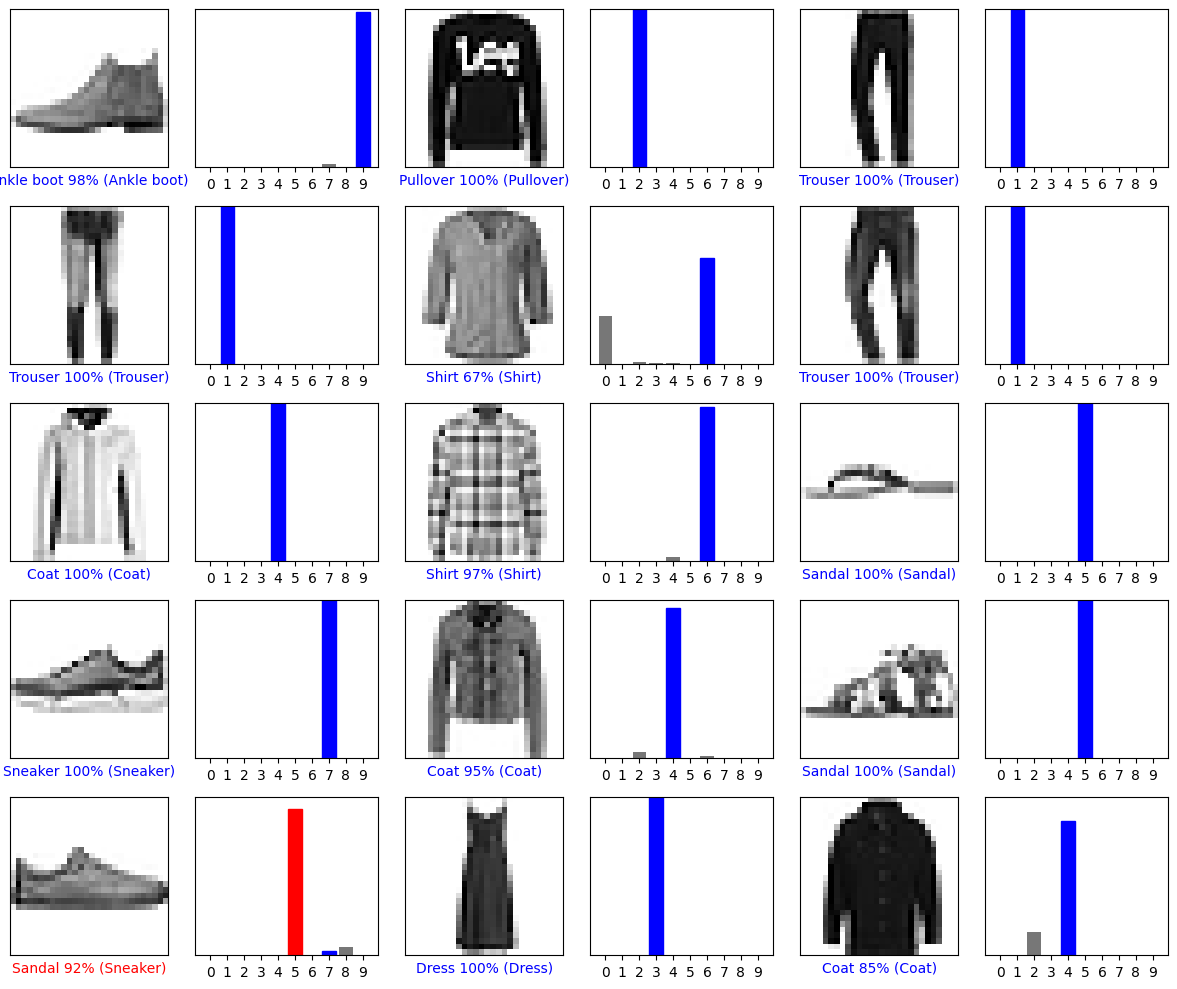

In [20]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()